In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load modeled and observed species concentration data
* Modeled data has 192 values, representing every half hour over 4 days (48 data points per day). We only need the last day, when the species reaches steady state.
* Observed data has 48 values, representing every half hour for one full day 

Function to plot species concentration across all 4 days of the F0AM run, to check that we reach steady-state by Day 4.
To change the species you want to plot, change the input for species_name.

Input: 
* species_name: a string with the name of the species in the chemical mechanism

Plot comparison between modeled and observed values for nitrogen oxide species. 
Inputs:
* model_species_name: array with strings NO and NO2 as named in the mechanism used
* obs_species_name: array with strings NO and NO2 as named in the observational data

Note that NOx was constrained for the model so that it should be the same between model & observed values

Plot NO to NO2 ratio for model and observed

Ozone comparison

In [3]:
run_dir = '/Users/vanessasun/Documents/phd/utah/research/USOS_shared/F0AM-4.3.0.1/Runs/USOS_'

#This function pulls the correct CSV files on photolysis rates for a run date. The photolysis rates are formatted to have the number of rows of nRep * 48 hours , where Day 1 is rows 0 to 47 (inclusive), Day 2 is rows 48 to 95 (inclusive), etc.
#Therefore, if we have 4 days with 3 days of spinup, then we have 192 rows total, and want to use results from Day 4 at rows [144:192]
#Inputs
    #rundate: str formatted with month_day_year with no zeroes in front of month/day if relevant

def structure_run_conc_file(rundate, run_number):
    run_path_plots = run_dir + rundate + '/Run' + str(run_number) + '/plots/'
    run_path = run_dir + rundate + '/Run' + str(run_number) + '/USOS_' + rundate
    model_conc_filepath =  run_path +  '_model_conc.csv'
    model_conc_load = pd.read_csv(model_conc_filepath)

    spinup_conc_path = run_path + '_spinup_conc.csv'
    spinup_conc_load = pd.read_csv(spinup_conc_path)

    obs_species_filepath = run_path + '_observed_conc.csv'
    obs_conc_load = pd.read_csv(obs_species_filepath)

    return run_path_plots, run_path, model_conc_load, obs_conc_load, spinup_conc_load, run_number
run_path_plots, run_path, model_conc_load, obs_conc_load, spinup_conc_load, run_number = structure_run_conc_file(rundate = '8_6_2024',run_number=21)

Function to plot species concentration across all 4 days of the F0AM run, to check that we reach steady-state by Day 4.
To change the species you want to plot, change the input for species_name.

Input: 
* species_name: a string with the name of the species in the chemical mechanism

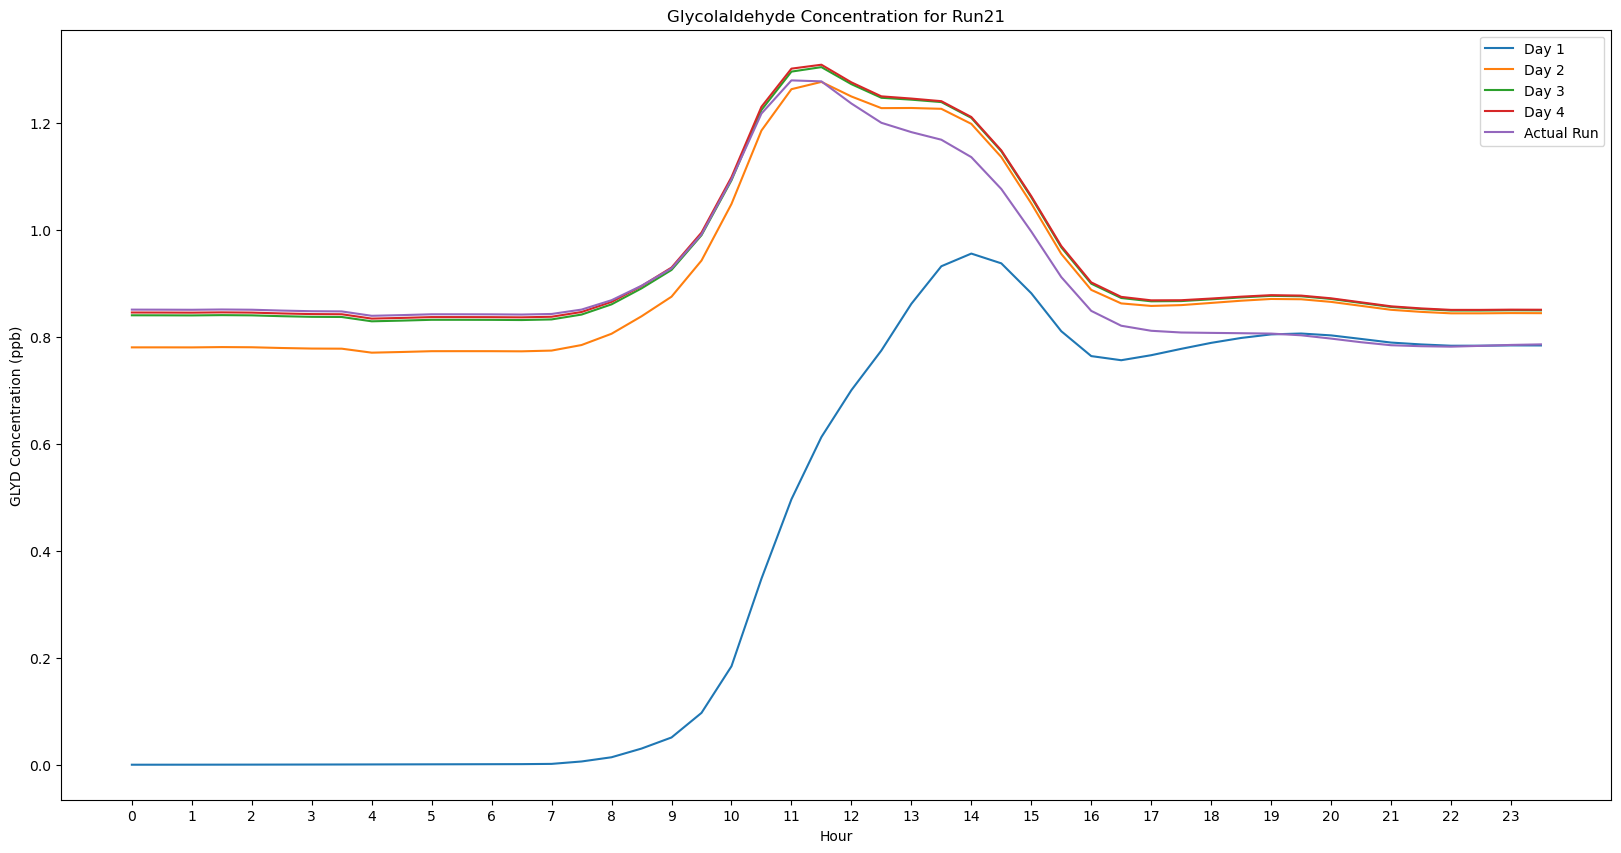

In [4]:
def SpeciesConc(species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(0,24,0.5)
    for day_val in range(0,4):
        day_df = spinup_conc_load.iloc[day_val*48:(day_val+1)*48]
        day_val_increase = int(day_val+1)
        day_label = 'Day ' + str(day_val_increase)
        plt.plot(hour_range, day_df[species_name], label = day_label)
        plt.xlabel('Hour')
        plt.ylabel(species_name + ' Concentration (ppb)')
        plt.xticks(np.arange(0,24))
    plt.plot(hour_range, model_conc_load[species_name], label = 'Actual Run')
    plt.legend()
    plt.title('Glycolaldehyde Concentration for Run'+str(run_number))
    plt.savefig(run_path_plots + 'glycolaldehyde_conc_over_4days.png')
    plt.show()
SpeciesConc(species_name = 'GLYD')

Plot comparison between modeled and observed values for nitrogen oxide species. 
Inputs:
* model_species_name: array with strings NO and NO2 as named in the mechanism used
* obs_species_name: array with strings NO and NO2 as named in the observational data

Note that NOx was constrained for the model so that it should be the same between model & observed values

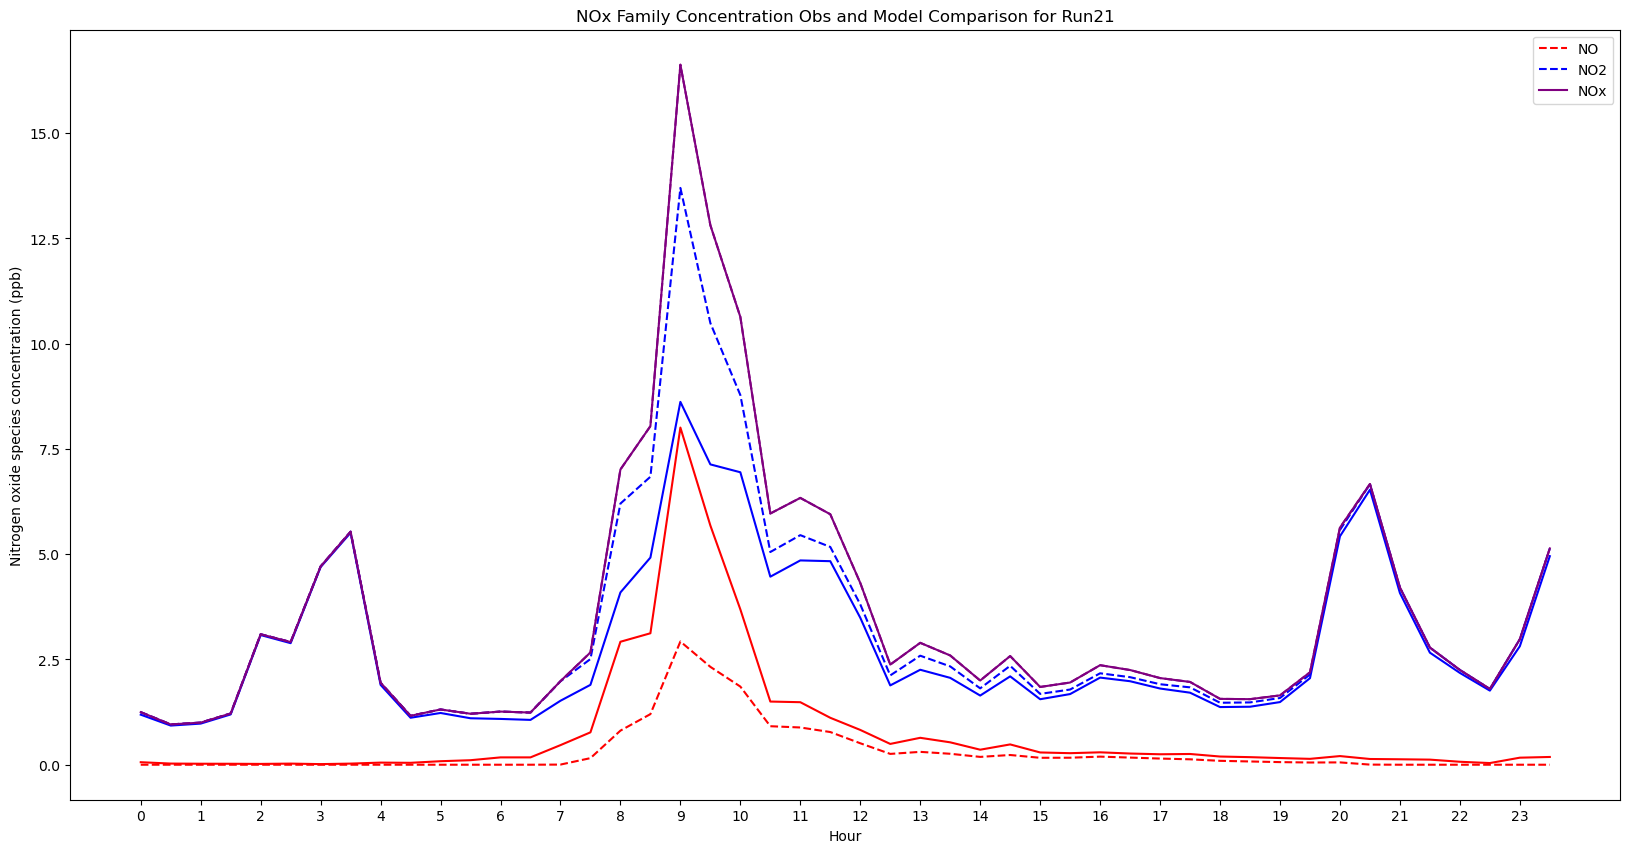

In [5]:
def NOxComparison(model_species_name, obs_species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(0,24,0.5)
    day4_idx = model_conc_load#.iloc[144:192]
    model_nox_add = day4_idx['NO']+day4_idx['NO2']
    obs_nox_add = obs_conc_load['NO_LIF'] + obs_conc_load['NO2_LIF']
    color_set = ['red','blue']

    for spec in range(0,len(model_species_name)):
        plt.plot(hour_range, day4_idx[model_species_name[spec]], label = model_species_name[spec],linestyle = 'dashed', color = color_set[spec])
        plt.plot(hour_range, obs_conc_load[obs_species_name[spec]], linestyle = 'solid', color = color_set[spec])
        plt.xlabel('Hour')
        plt.ylabel('Nitrogen oxide species concentration (ppb)')
        plt.xticks(np.arange(0,24))
    
    plt.plot(hour_range,model_nox_add, label = 'NOx', linestyle = 'solid', color = 'purple')
    plt.plot(hour_range,obs_nox_add, linestyle = 'dashed', color = 'purple')

    plt.legend()
    plt.title('NOx Family Concentration Obs and Model Comparison for Run'+str(run_number))
    plt.savefig(run_path_plots + 'nox_family_compare_model_and_obs.png')
    plt.show()

NOxComparison(model_species_name = ['NO','NO2'], obs_species_name = ['NO_LIF', 'NO2_LIF'])

Plot NO to NO2 ratio for model and observed

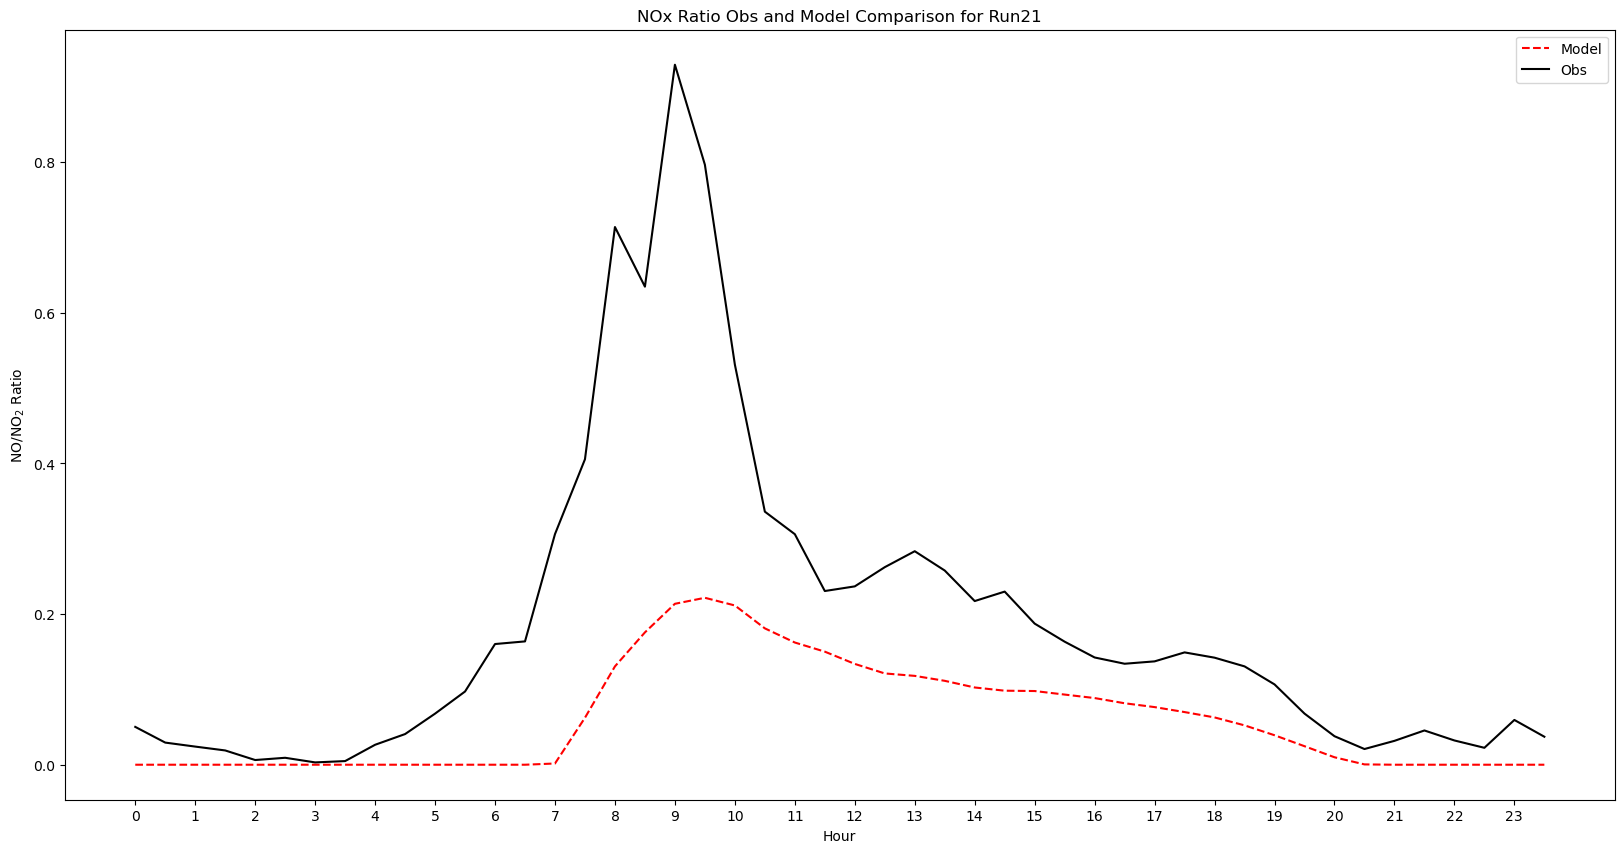

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(0,24,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_nox_ratio = model_nox_add = day4_idx['NO']/day4_idx['NO2']
obs_nox_ratio = obs_conc_load['NO_LIF']/obs_conc_load['NO2_LIF']

plt.plot(hour_range,model_nox_ratio, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_nox_ratio, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.ylabel('NO/NO$_2$ Ratio')

plt.legend()
plt.title('NOx Ratio Obs and Model Comparison for Run'+str(run_number))
plt.savefig(run_path_plots +  'no_no2_ratio_compare_model_and_obs.png')
plt.show()


Ozone comparison

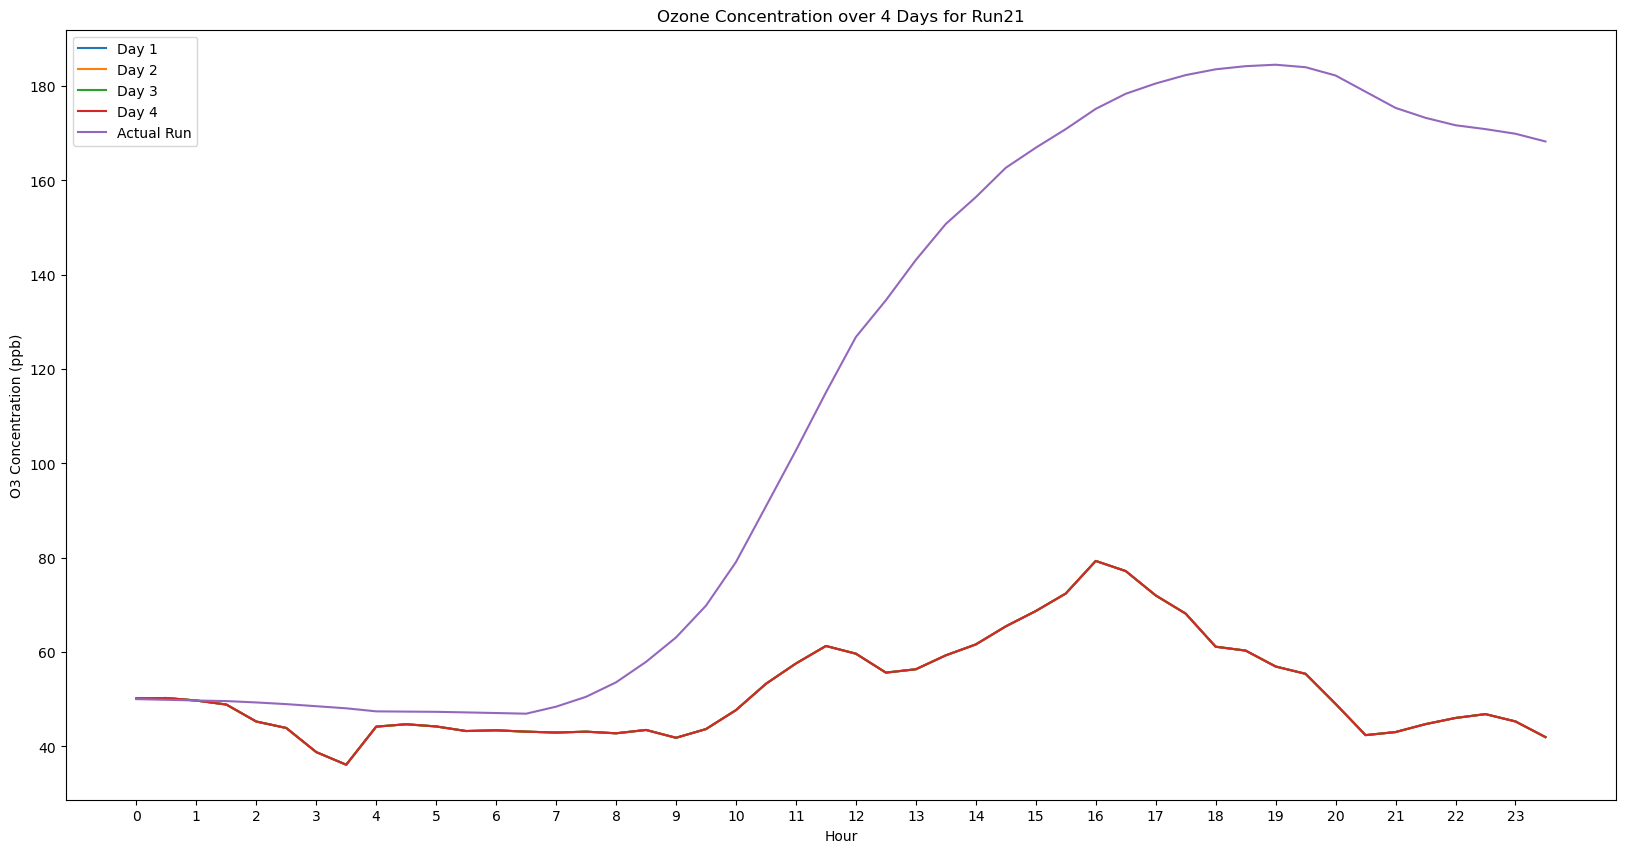

In [7]:
def SpeciesConc(species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(0,24,0.5)
    for day_val in range(0,4):
        day_df = spinup_conc_load.iloc[day_val*48:(day_val+1)*48]
        day_val_increase = int(day_val+1)
        day_label = 'Day ' + str(day_val_increase)
        plt.plot(hour_range, day_df[species_name], label = day_label)
        plt.xlabel('Hour')
        plt.ylabel(species_name + ' Concentration (ppb)')
        plt.xticks(np.arange(0,24))
    plt.plot(hour_range, model_conc_load[species_name], label = 'Actual Run')
    plt.legend()
    plt.savefig(run_path_plots +  'ozone_conc_over_4days_model.png')
    plt.title('Ozone Concentration over 4 Days for Run'+str(run_number))
    plt.show()
SpeciesConc(species_name = 'O3')

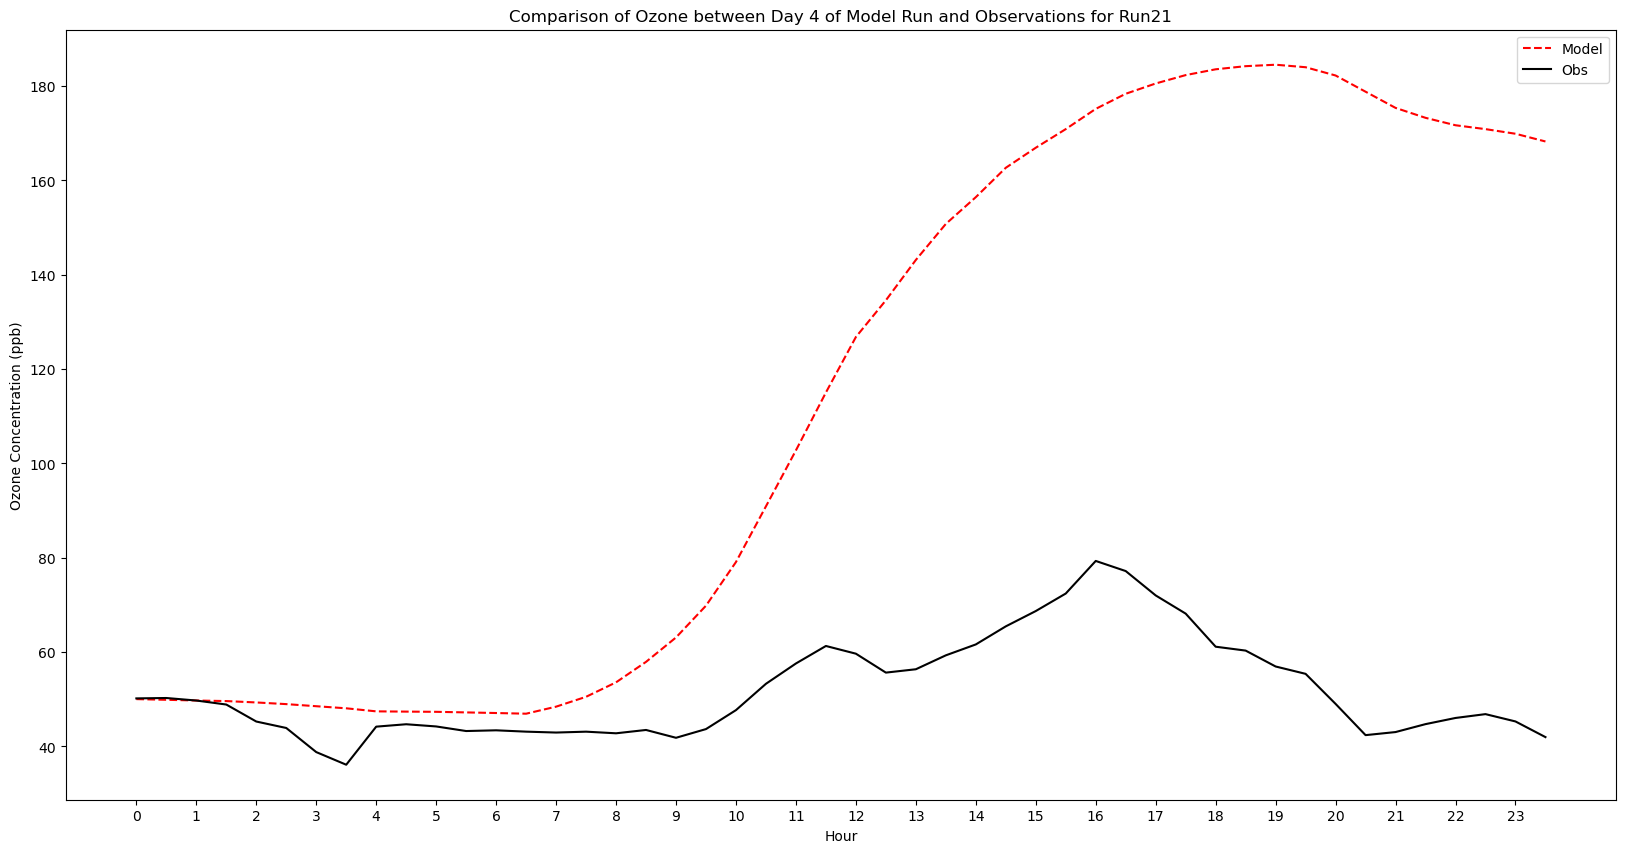

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(0,24,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_ozone = day4_idx['O3']
obs_ozone = obs_conc_load['O3_ppbv']

plt.plot(hour_range,model_ozone, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_ozone, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.ylabel('Ozone Concentration (ppb)')
plt.title('Comparison of Ozone between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots +  'ozone_compare_model_and_obs.png')
plt.show()


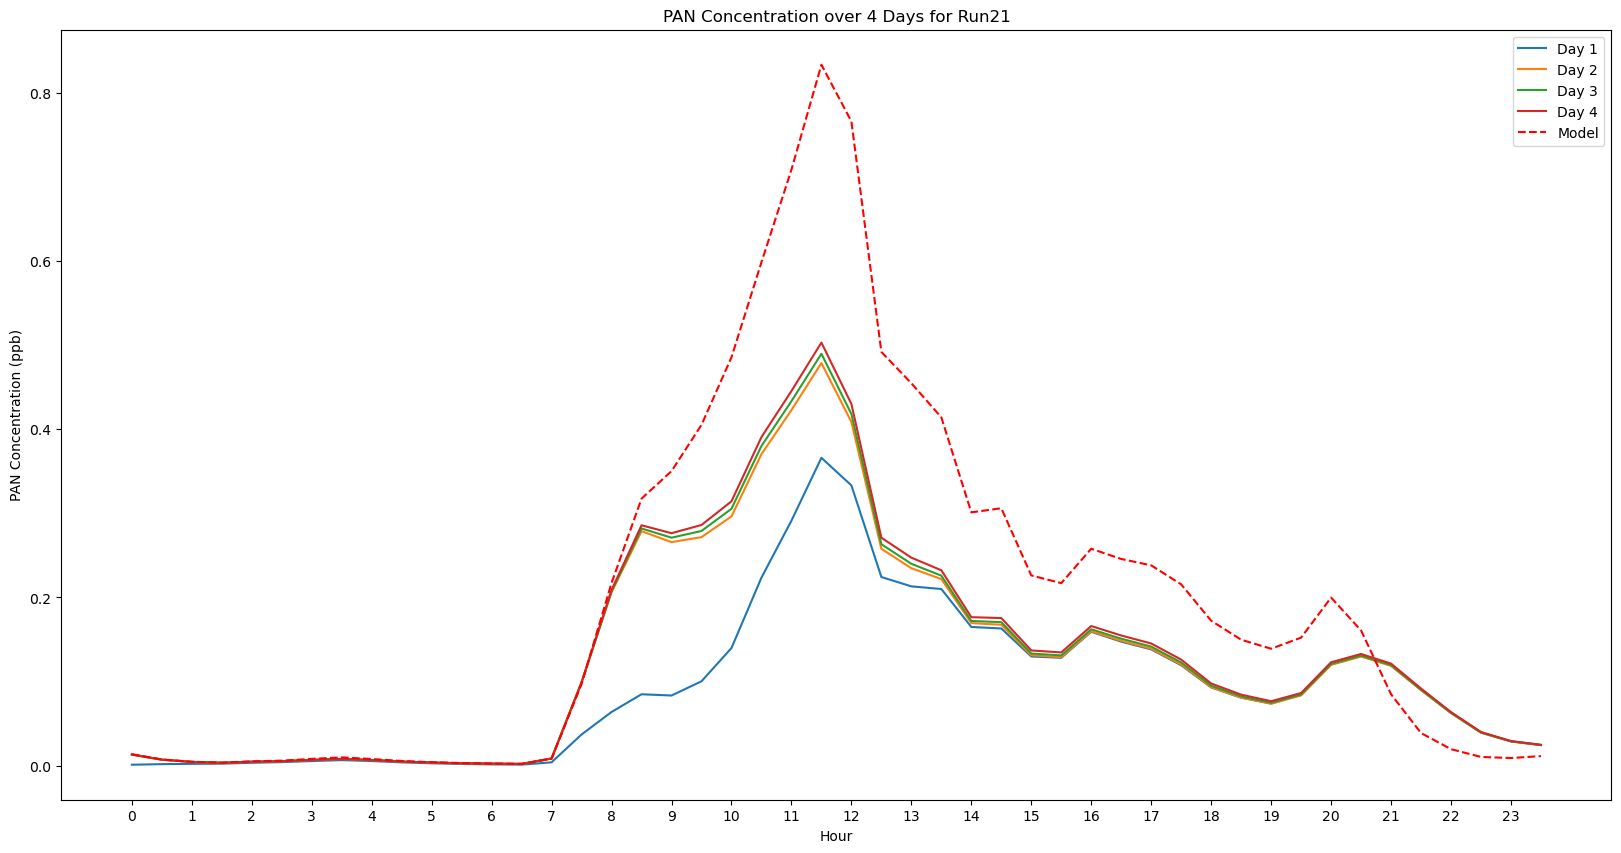

In [9]:
def SpeciesConc(species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(0,24,0.5)
    for day_val in range(0,4):
        day_df = spinup_conc_load.iloc[day_val*48:(day_val+1)*48]
        day_val_increase = int(day_val+1)
        day_label = 'Day ' + str(day_val_increase)
        plt.plot(hour_range, day_df[species_name], label = day_label)
        plt.xlabel('Hour')
        plt.ylabel(species_name + ' Concentration (ppb)')
        plt.xticks(np.arange(0,24))
    plt.plot(hour_range,model_conc_load[species_name], label = 'Model', linestyle = 'dashed', color = 'red')
    plt.legend()
    plt.title('PAN Concentration over 4 Days for Run'+str(run_number))
    plt.savefig(run_path_plots +  'pan_conc_over_4days_model.png')
    plt.show()
SpeciesConc(species_name = 'PAN')

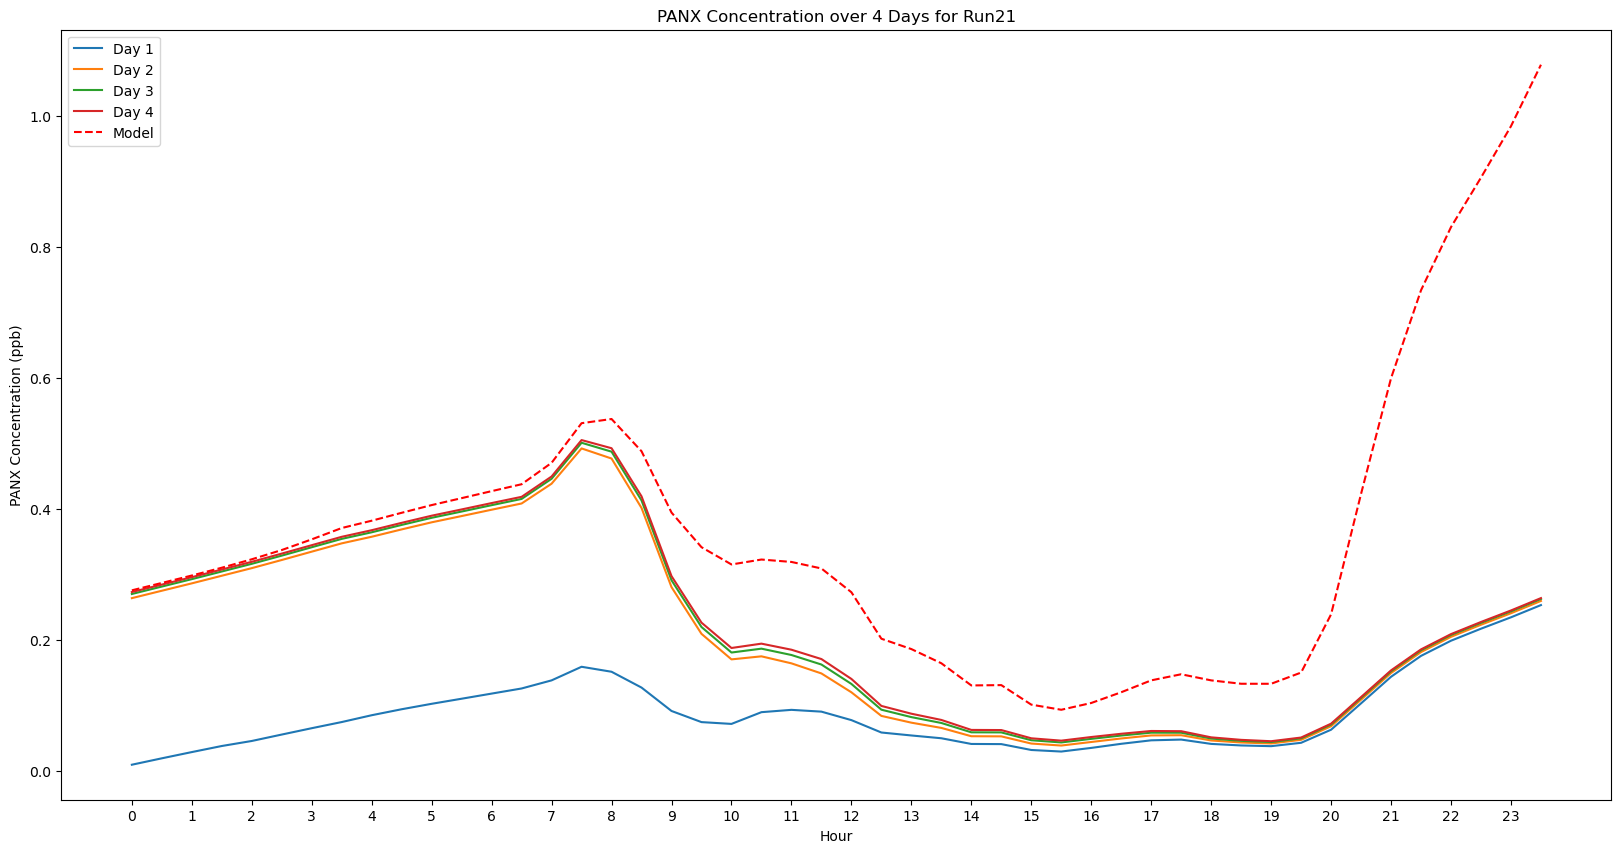

In [10]:
def SpeciesConc(species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(0,24,0.5)
    for day_val in range(0,4):
        day_df = spinup_conc_load.iloc[day_val*48:(day_val+1)*48]
        day_val_increase = int(day_val+1)
        day_label = 'Day ' + str(day_val_increase)
        plt.plot(hour_range, day_df[species_name], label = day_label)
        plt.xlabel('Hour')
        plt.ylabel(species_name + ' Concentration (ppb)')
        plt.xticks(np.arange(0,24))
    plt.plot(hour_range,model_conc_load[species_name], label = 'Model', linestyle = 'dashed', color = 'red')
    plt.legend()
    plt.title('PANX Concentration over 4 Days for Run'+str(run_number))
    plt.savefig(run_path_plots +  'panx_conc_over_4days_model.png')
    plt.show()
SpeciesConc(species_name = 'PANX')

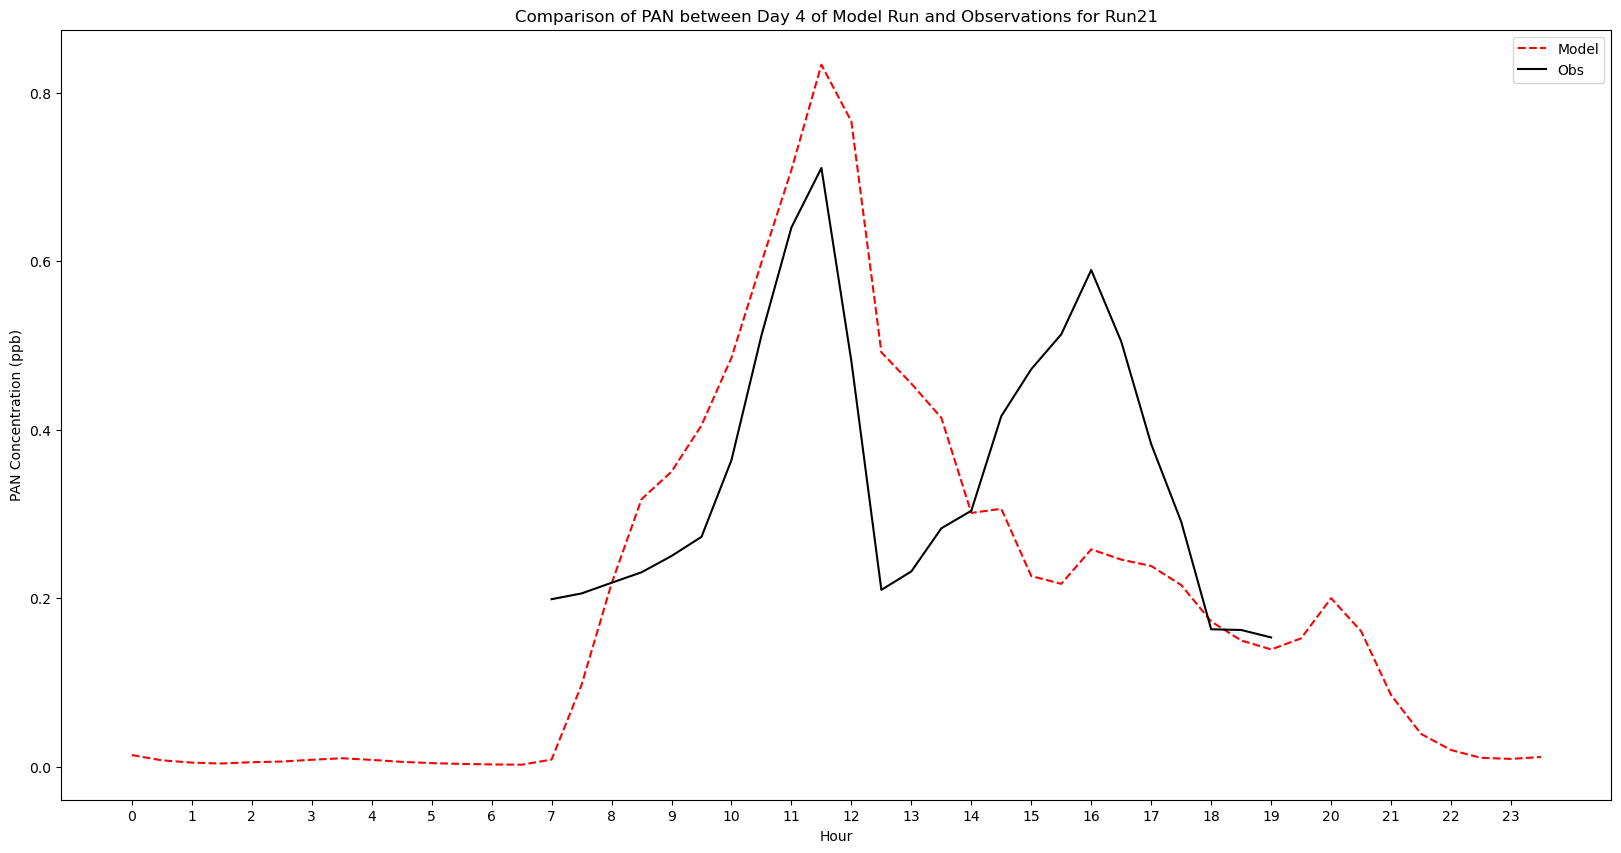

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(0,24,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_pan = day4_idx['PAN']
obs_pan = obs_conc_load['PAN_CIMS']

plt.plot(hour_range,model_pan, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_pan, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.ylabel('PAN Concentration (ppb)')
plt.title('Comparison of PAN between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots + 'pan_compare_model_and_obs.png')
plt.show()


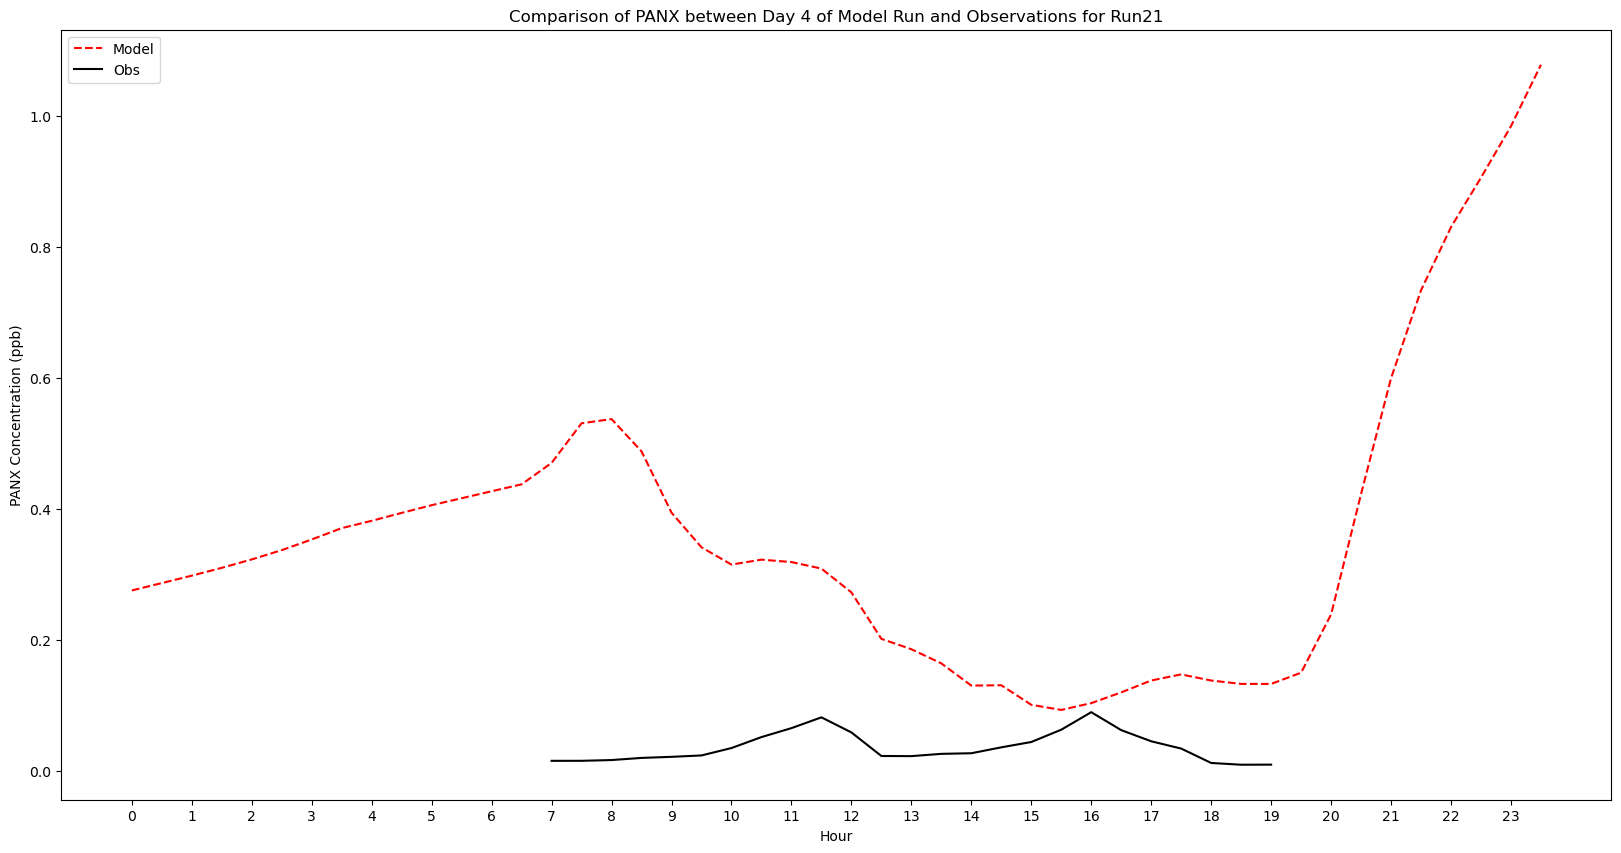

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(0,24,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_panx = day4_idx['PANX']
obs_panx = obs_conc_load['PPN_CIMS']

plt.plot(hour_range,model_panx, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_panx, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.ylabel('PANX Concentration (ppb)')
plt.title('Comparison of PANX between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots + 'panx_compare_model_and_obs.png')
plt.show()


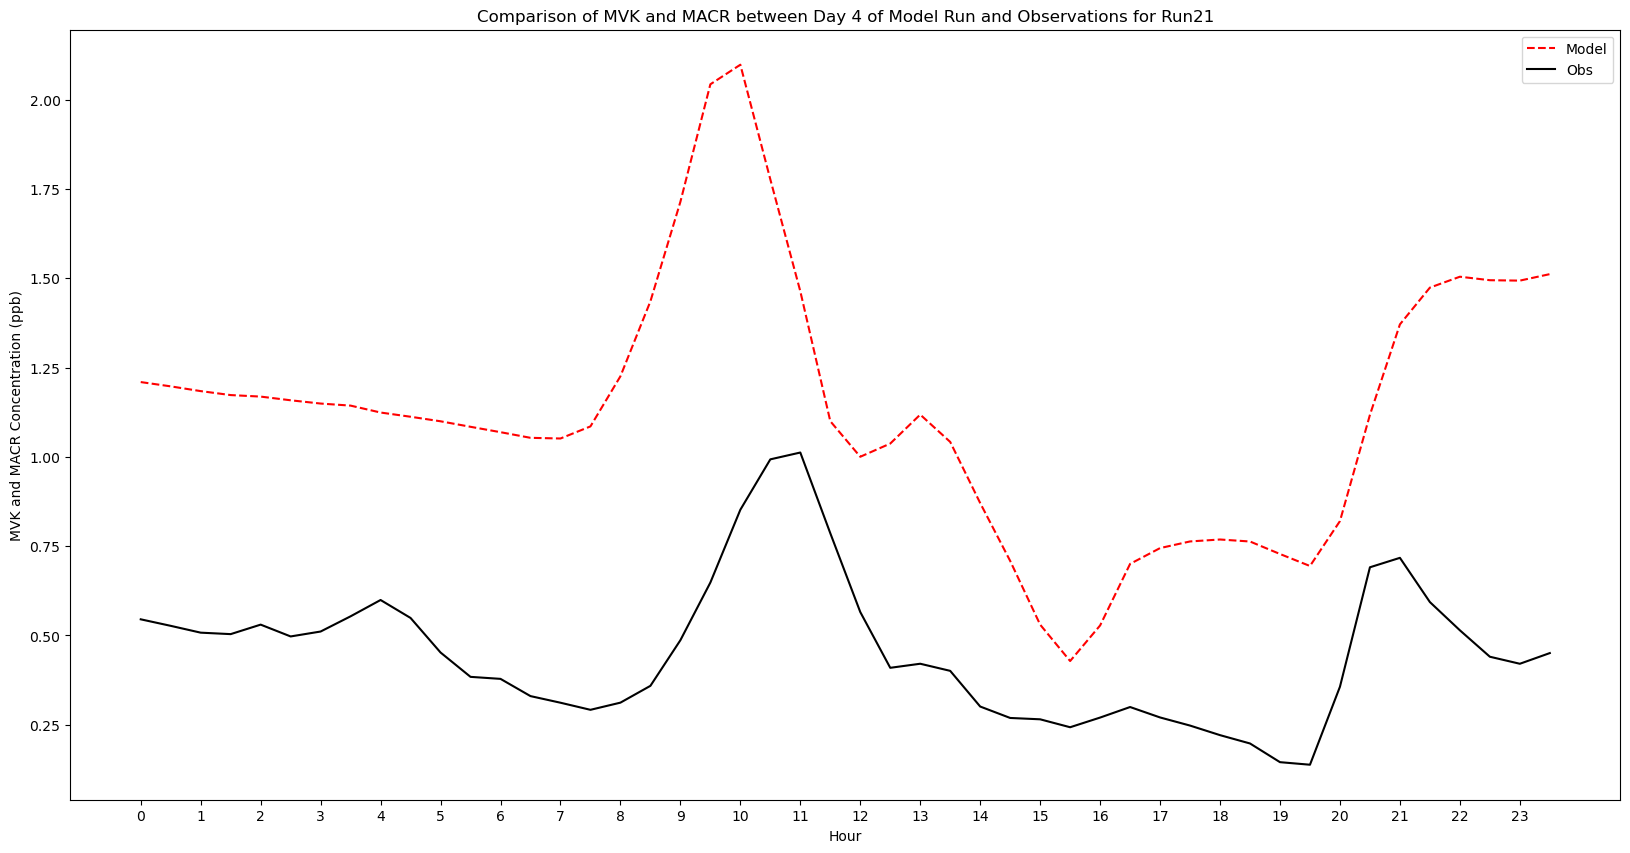

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(0,24,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_mvk = day4_idx['ISPD']
obs_mvk = obs_conc_load['MVK_MACR_PTR']

plt.plot(hour_range,model_mvk, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_mvk, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.ylabel('MVK and MACR Concentration (ppb)')
plt.title('Comparison of MVK and MACR between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots + 'mvk_macr_compare_model_and_obs.png')
plt.show()


---

## Day Only

In [265]:
run_dir = '/Users/vanessasun/Documents/phd/utah/research/USOS_shared/F0AM-4.3.0.1/Runs/USOS_'

#This function pulls the correct CSV files on photolysis rates for a run date. The photolysis rates are formatted to have the number of rows of nRep * 48 hours , where Day 1 is rows 0 to 47 (inclusive), Day 2 is rows 48 to 95 (inclusive), etc.
#Therefore, if we have 4 days with 3 days of spinup, then we have 192 rows total, and want to use results from Day 4 at rows [144:192]
#Inputs
    #rundate: str formatted with month_day_year with no zeroes in front of month/day if relevant

def structure_run_conc_file(rundate, run_number):
    run_path_plots = run_dir + rundate + '/day_only/Run' + str(run_number) + '/plots/'
    run_path = run_dir + rundate + '/day_only/Run' + str(run_number) + '/USOS_' + rundate
    model_conc_filepath =  run_path +  '_model_conc.csv'
    model_conc_load = pd.read_csv(model_conc_filepath)

    spinup_conc_path = run_path + '_spinup_conc.csv'
    spinup_conc_load = pd.read_csv(spinup_conc_path)

    obs_species_filepath = run_path + '_observed_conc.csv'
    obs_conc_load = pd.read_csv(obs_species_filepath)

    return run_path_plots, run_path, model_conc_load, obs_conc_load, spinup_conc_load, run_number
run_path_plots, run_path, model_conc_load, obs_conc_load, spinup_conc_load, run_number = structure_run_conc_file(rundate = '8_6_2024',run_number=1)

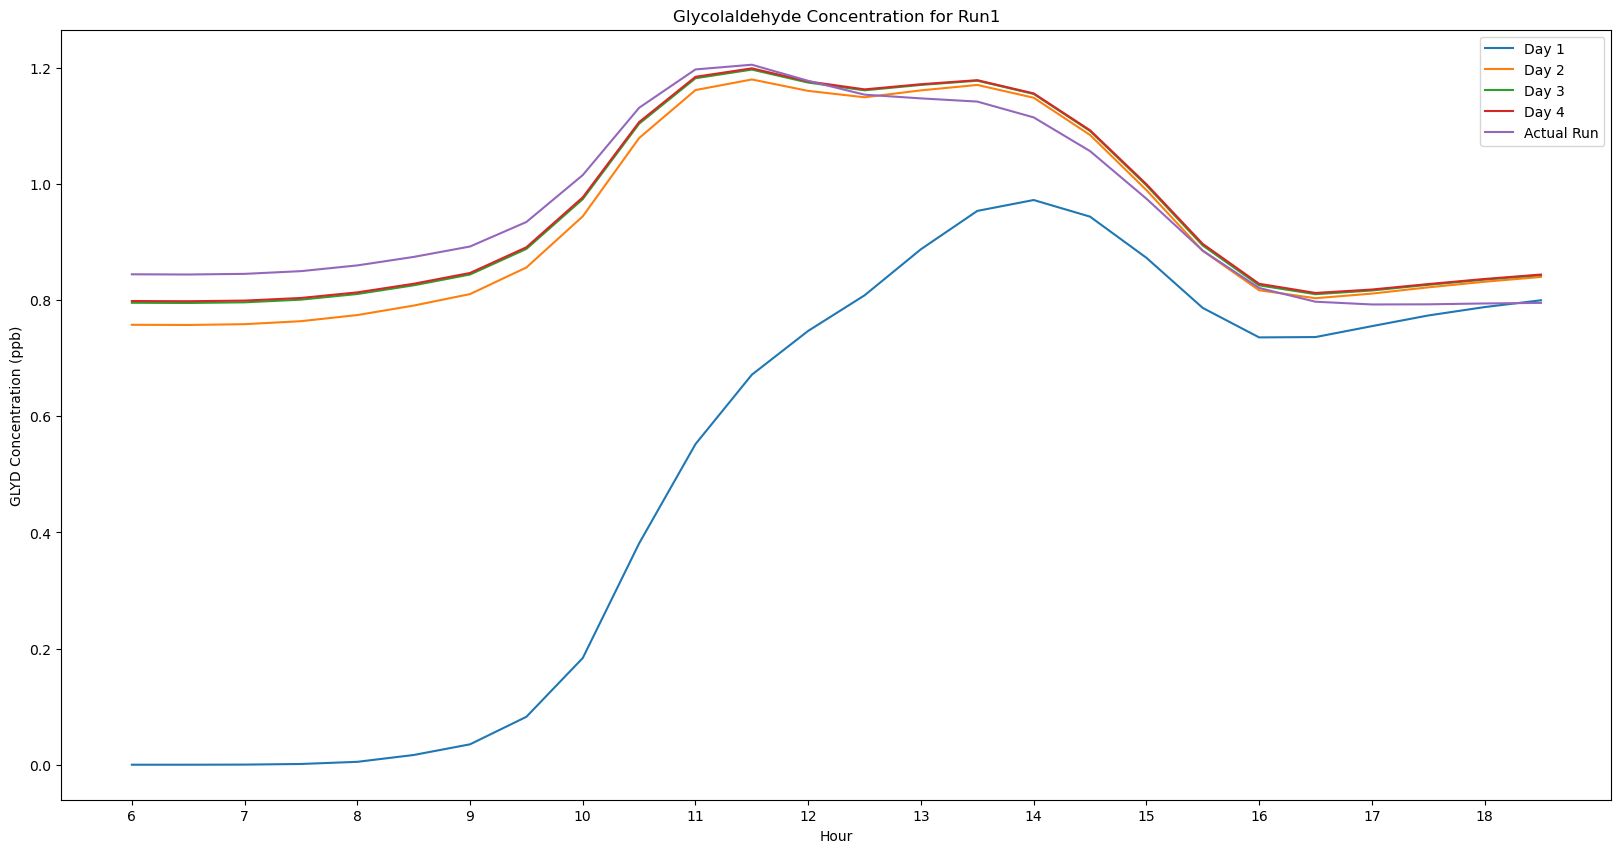

In [266]:
def SpeciesConc(species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(6,19,0.5)
    for day_val in range(0,4):
        day_df = spinup_conc_load.iloc[day_val*26:(day_val+1)*26]
        day_val_increase = int(day_val+1)
        day_label = 'Day ' + str(day_val_increase)
        plt.plot(hour_range, day_df[species_name], label = day_label)
        plt.xlabel('Hour')
        plt.ylabel(species_name + ' Concentration (ppb)')
        plt.xticks(np.arange(6,19))
    plt.plot(hour_range, model_conc_load[species_name], label = 'Actual Run')
    plt.legend()
    plt.title('Glycolaldehyde Concentration for Run'+str(run_number))
    plt.savefig(run_path_plots + 'glycolaldehyde_conc_over_4days.png')
    plt.show()
SpeciesConc(species_name = 'GLYD')

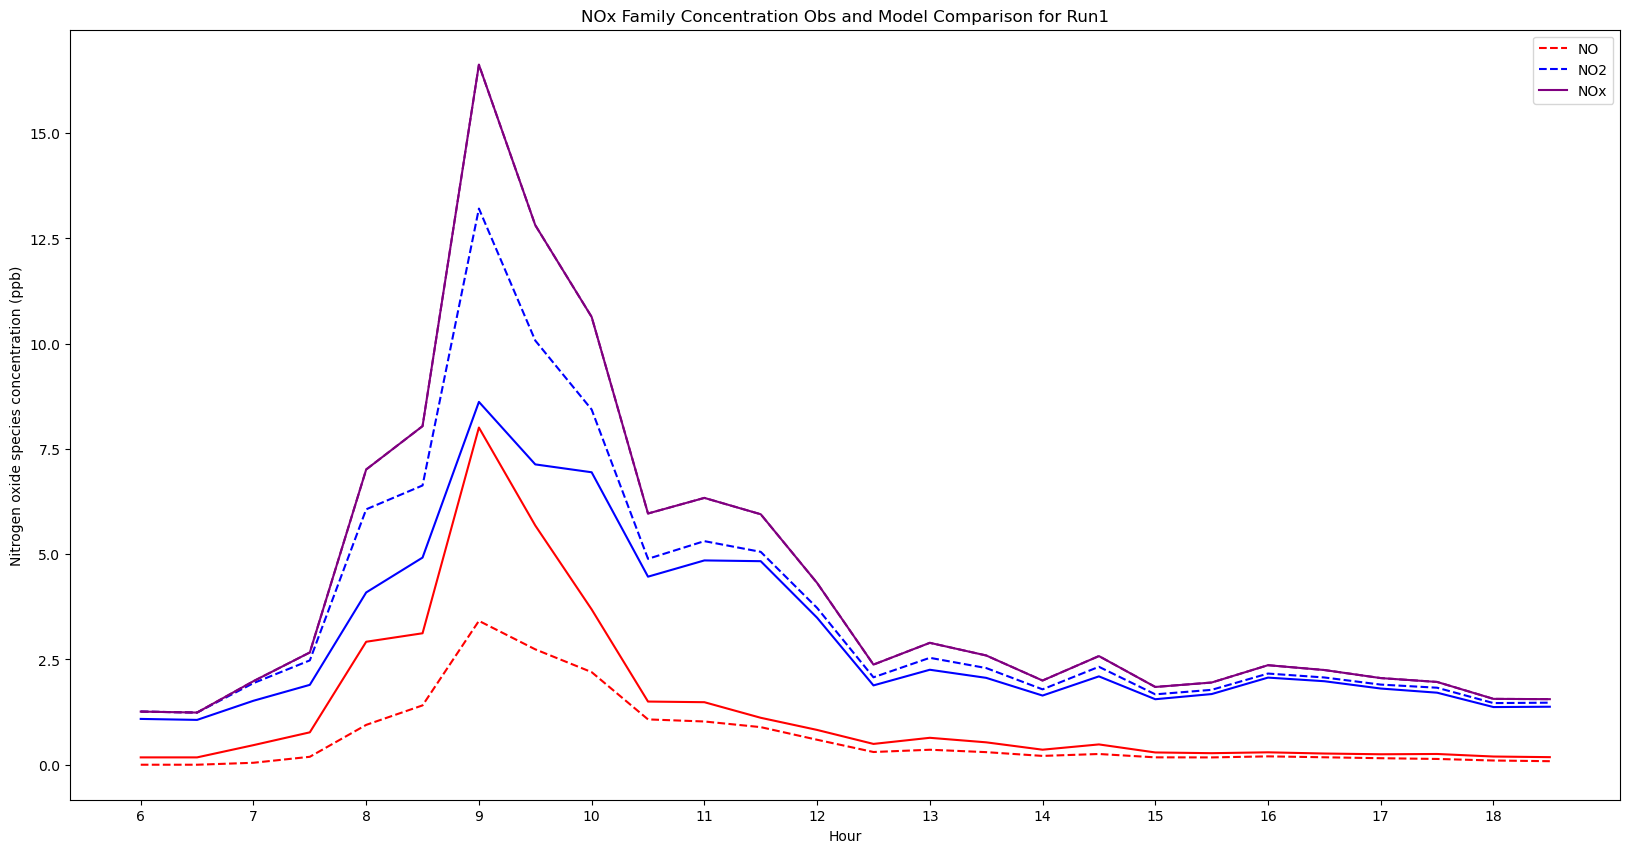

In [267]:
def NOxComparison(model_species_name, obs_species_name):
    fig, ax = plt.subplots(figsize = (20,10))
    hour_range = np.arange(6,19,0.5)
    day4_idx = model_conc_load#.iloc[144:192]
    model_nox_add = day4_idx['NO']+day4_idx['NO2']
    obs_nox_add = obs_conc_load['NO_LIF'] + obs_conc_load['NO2_LIF']
    color_set = ['red','blue']

    for spec in range(0,len(model_species_name)):
        plt.plot(hour_range, day4_idx[model_species_name[spec]], label = model_species_name[spec],linestyle = 'dashed', color = color_set[spec])
        plt.plot(hour_range, obs_conc_load[obs_species_name[spec]], linestyle = 'solid', color = color_set[spec])
        plt.xlabel('Hour')
        plt.ylabel('Nitrogen oxide species concentration (ppb)')
        plt.xticks(np.arange(6,19))
    
    plt.plot(hour_range,model_nox_add, label = 'NOx', linestyle = 'solid', color = 'purple')
    plt.plot(hour_range,obs_nox_add, linestyle = 'dashed', color = 'purple')

    plt.legend()
    plt.title('NOx Family Concentration Obs and Model Comparison for Run'+str(run_number))
    plt.savefig(run_path_plots + 'nox_family_compare_model_and_obs.png')
    plt.show()

NOxComparison(model_species_name = ['NO','NO2'], obs_species_name = ['NO_LIF', 'NO2_LIF'])

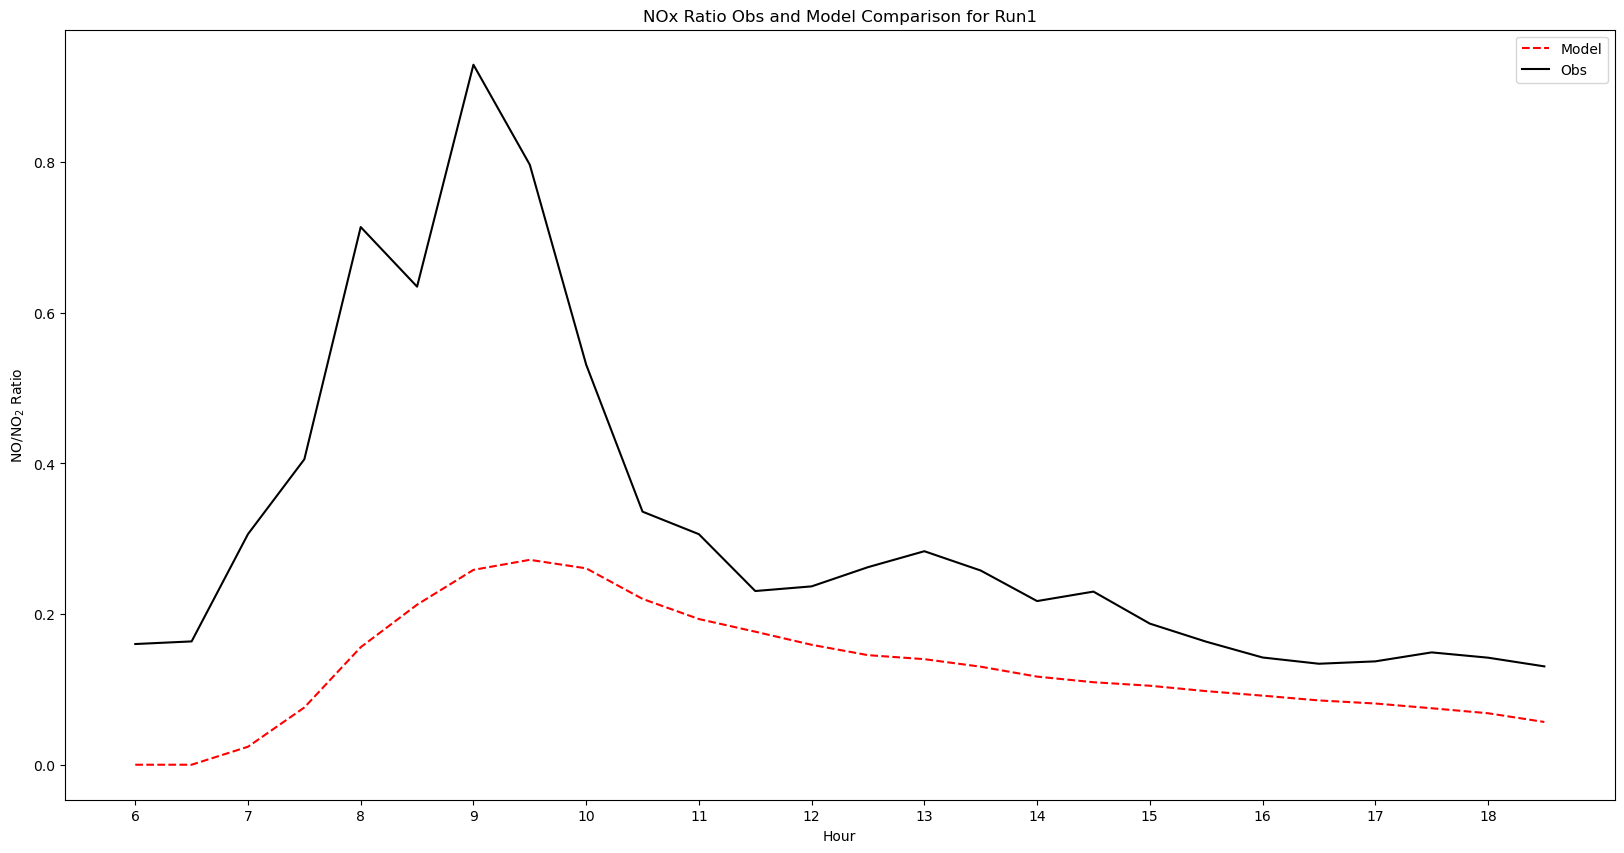

In [268]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(6,19,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_nox_ratio = model_nox_add = day4_idx['NO']/day4_idx['NO2']
obs_nox_ratio = obs_conc_load['NO_LIF']/obs_conc_load['NO2_LIF']

plt.plot(hour_range,model_nox_ratio, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_nox_ratio, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(6,19))
plt.ylabel('NO/NO$_2$ Ratio')

plt.legend()
plt.title('NOx Ratio Obs and Model Comparison for Run'+str(run_number))
plt.savefig(run_path_plots +  'no_no2_ratio_compare_model_and_obs.png')
plt.show()


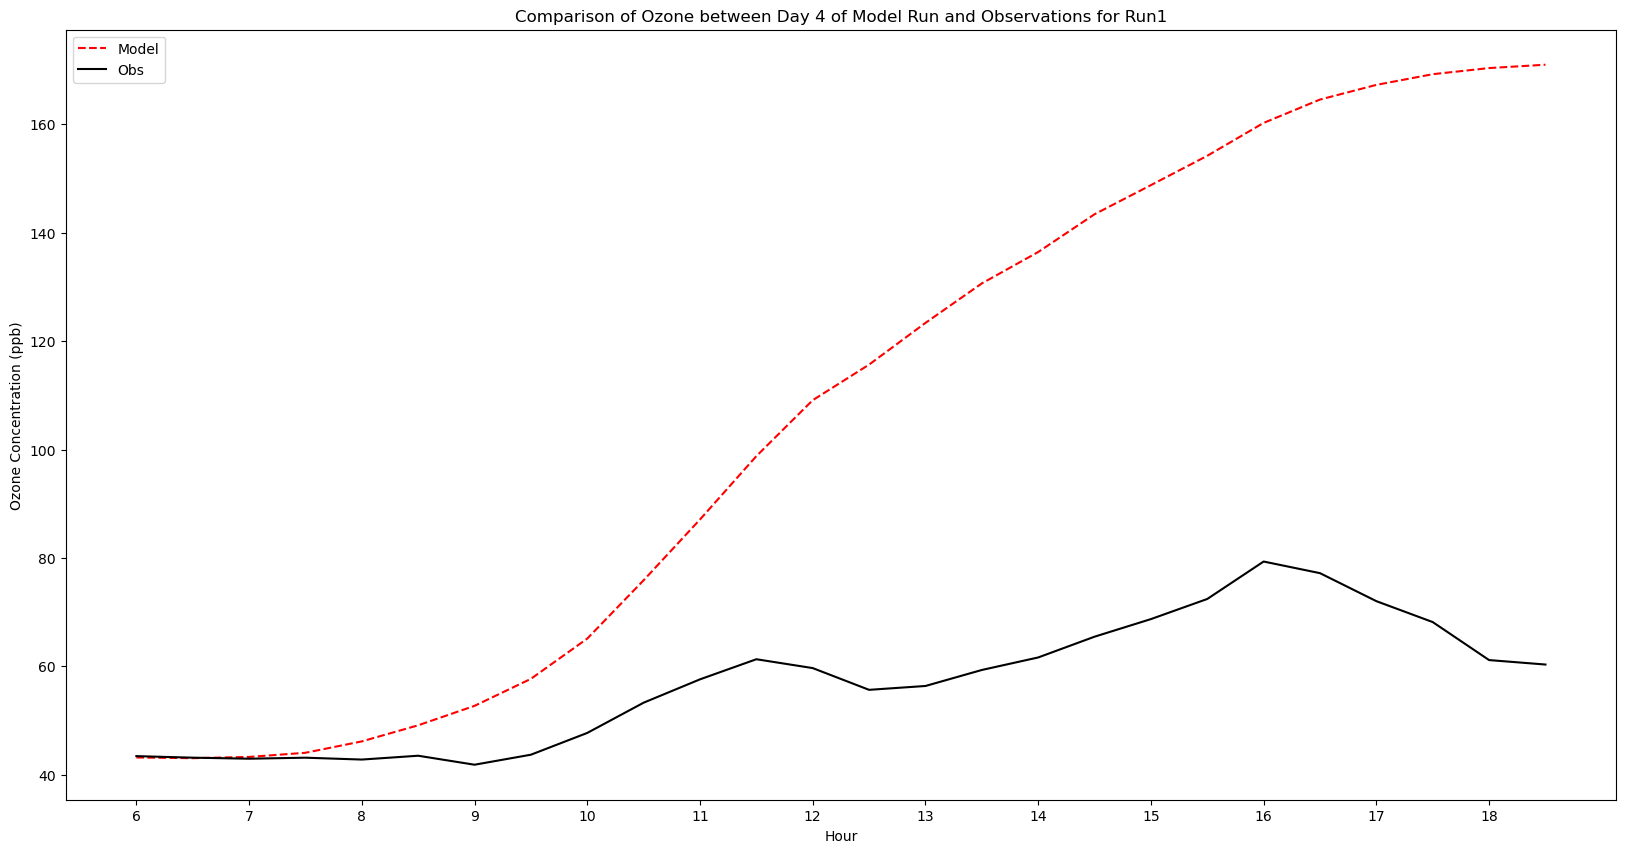

In [269]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(6,19,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_ozone = day4_idx['O3']
obs_ozone = obs_conc_load['O3_ppbv']

plt.plot(hour_range,model_ozone, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_ozone, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(6,19))
plt.ylabel('Ozone Concentration (ppb)')
plt.title('Comparison of Ozone between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots +  'ozone_compare_model_and_obs.png')
plt.show()

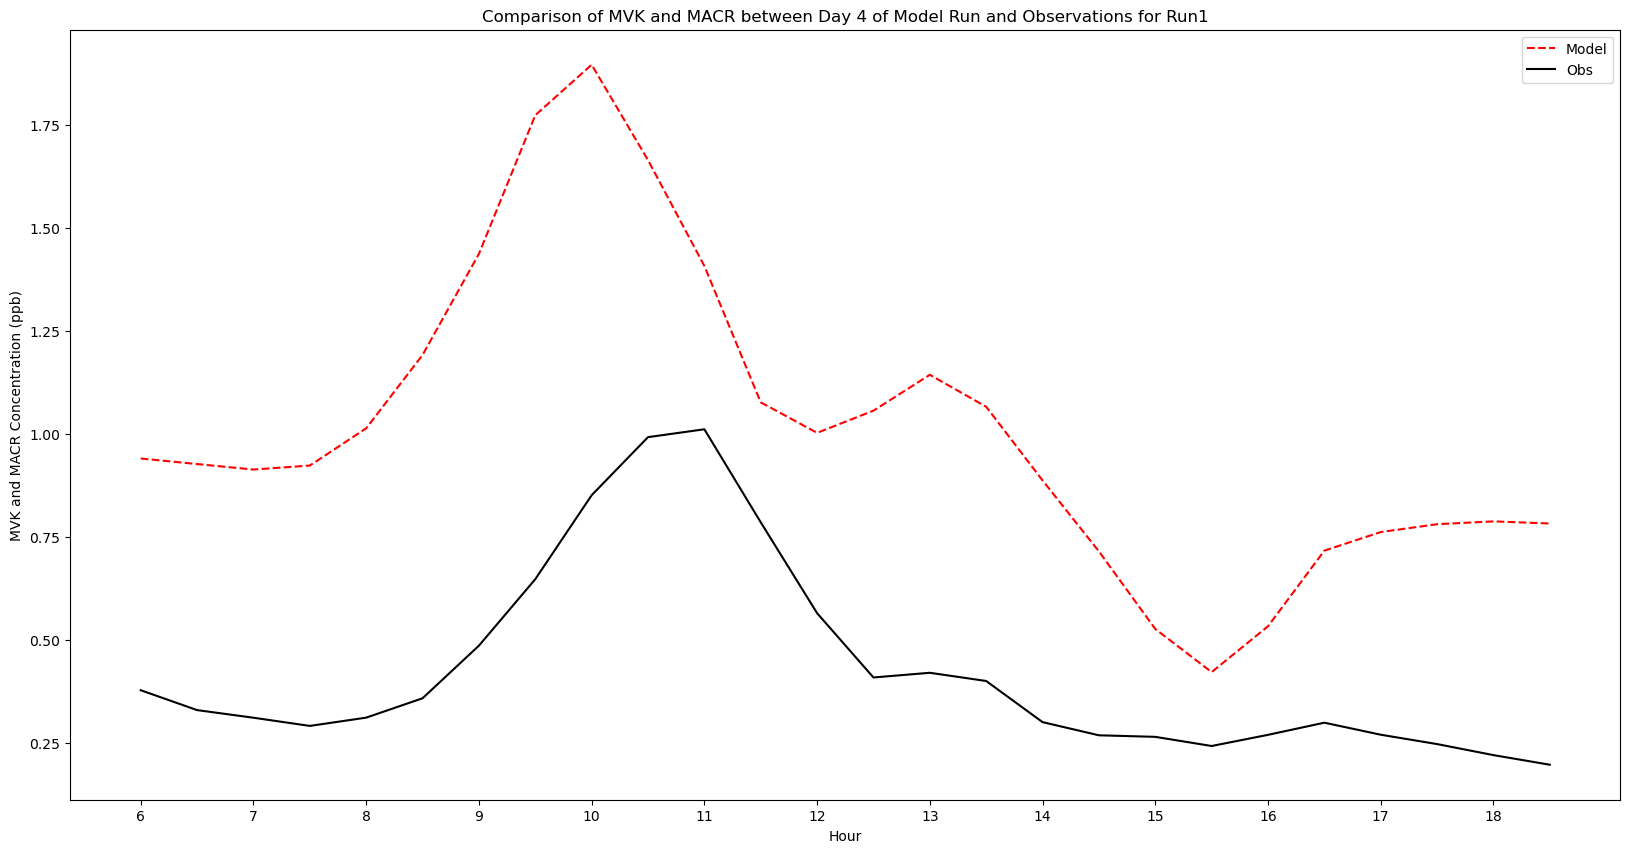

In [270]:
fig, ax = plt.subplots(figsize = (20,10))
hour_range = np.arange(6,19,0.5)

day4_idx = model_conc_load#.iloc[144:192]
model_mvk = day4_idx['ISPD']
obs_mvk = obs_conc_load['MVK_MACR_PTR']

plt.plot(hour_range,model_mvk, label = 'Model', linestyle = 'dashed', color = 'red')
plt.plot(hour_range,obs_mvk, label = 'Obs', linestyle = 'solid', color = 'black')
plt.xlabel('Hour')
plt.xticks(np.arange(6,19))
plt.ylabel('MVK and MACR Concentration (ppb)')
plt.title('Comparison of MVK and MACR between Day 4 of Model Run and Observations for Run'+str(run_number))

plt.legend()
plt.savefig(run_path_plots + 'mvk_macr_compare_model_and_obs.png')
plt.show()


In [277]:
run_dir = '/Users/vanessasun/Documents/phd/utah/research/USOS_shared/F0AM-4.3.0.1/Runs/USOS_'

#This function pulls the correct CSV files on photolysis rates for a run date. The photolysis rates are formatted to have the number of rows of nRep * 48 hours , where Day 1 is rows 0 to 47 (inclusive), Day 2 is rows 48 to 95 (inclusive), etc.
#Therefore, if we have 4 days with 3 days of spinup, then we have 192 rows total, and want to use results from Day 4 at rows [144:192]
#Inputs
    #rundate: str formatted with month_day_year with no zeroes in front of month/day if relevant

def structure_run_photolysis_file(rundate, run_number):
    run_path_plots = run_dir + rundate + '/day_only/Run' + str(run_number) + '/plots/'
    run_path = run_dir + rundate + '/day_only/Run' + str(run_number) + '/USOS_' + rundate
    model_photolysis_rates_filepath =  run_path +  '_model_photolysis_rates.csv'
    model_photolysis_rxn_names_filepath = run_path + '_model_photolysis_rxn_names.csv'
    model_photolysis_rxn_names_load = pd.read_csv(model_photolysis_rxn_names_filepath, index_col = False)
    model_photolysis_rates_load = pd.read_csv(model_photolysis_rates_filepath,index_col = False,header=None)
    model_photolysis_rates_load.columns = model_photolysis_rxn_names_load.iloc[0]

    obs_species_filepath = run_path + '_observed_conc.csv'
    obs_conc_load = pd.read_csv(obs_species_filepath)

    return run_path_plots,run_path, model_photolysis_rates_load, obs_conc_load, run_number
run_path_plots,run_path, model_photolysis_rates_load, obs_conc_load, run_number = structure_run_photolysis_file(rundate = '8_6_2024',run_number=1)

In [278]:
obs_jno2 = obs_conc_load['jNO2_meas']
model_jno2 = model_photolysis_rates_load.iloc[:,0]

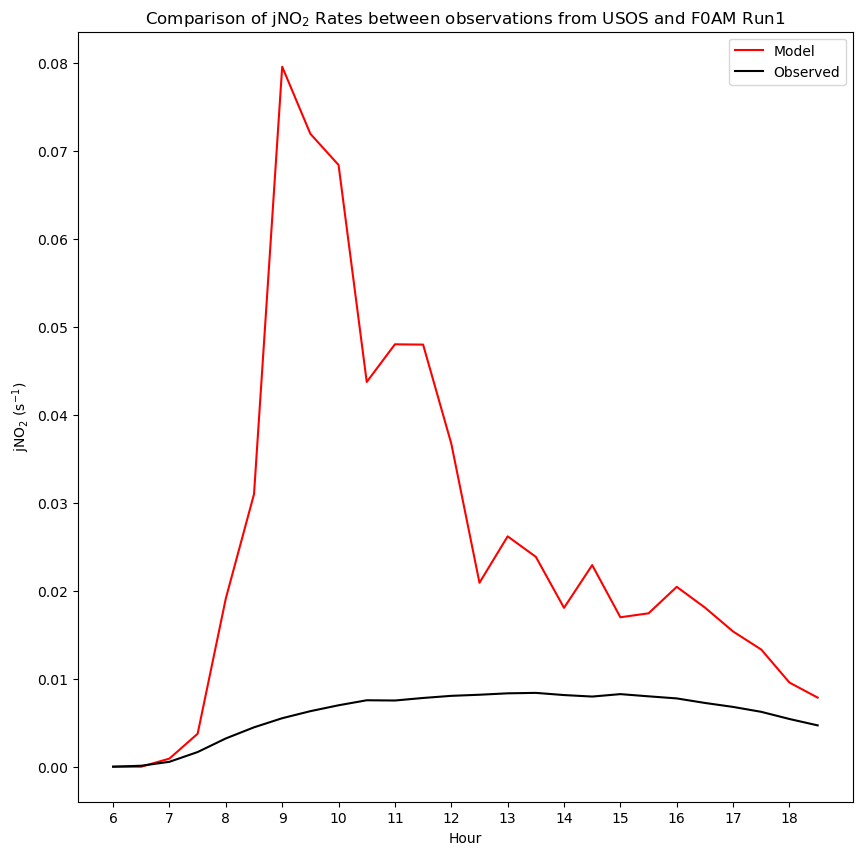

In [279]:
fig, ax = plt.subplots(figsize = (10,10))
hour_range = np.arange(6,19,0.5)
plt.plot(hour_range, model_jno2, label = 'Model', color = 'red')
plt.plot(hour_range, obs_jno2, label = 'Observed', color = 'black')
plt.xlabel('Hour')
plt.ylabel('jNO$_2$ (s$^{-1}$)')
plt.title('Comparison of jNO$_2$ Rates between observations from USOS and F0AM Run'+str(run_number))
plt.xticks(np.arange(6,19))
plt.legend()
#plt.savefig(run_path_plots + 'jno2_compare_plot.png')
plt.show()


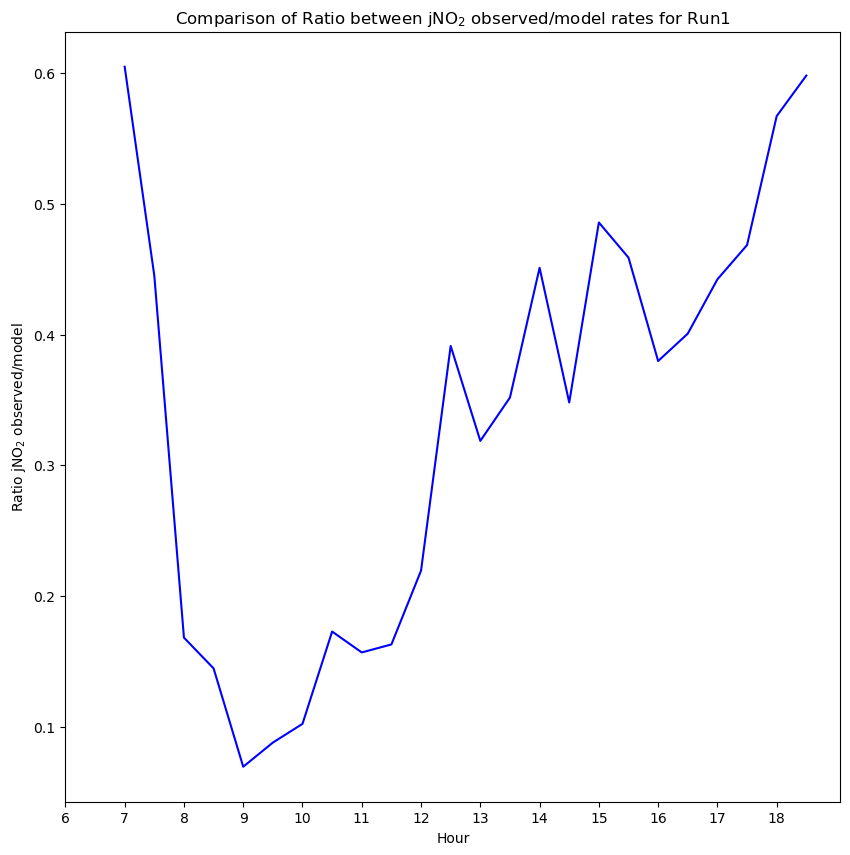

In [280]:
ratio_jno2 = obs_jno2/model_jno2

fig, ax = plt.subplots(figsize = (10,10))
hour_range = np.arange(6,19,0.5)
plt.plot(hour_range, ratio_jno2, color = 'blue')
plt.xlabel('Hour')
plt.ylabel('Ratio jNO$_2$ observed/model')
plt.title('Comparison of Ratio between jNO$_2$ observed/model rates for Run'+str(run_number))
plt.xticks(np.arange(6,19))
#plt.savefig(run_path_plots + 'jno2_ratio_plot.png')
plt.show()

In [284]:
print(model_photolysis_rates_load.iloc[:,0])

0     0.000000
1     0.000000
2     0.000928
3     0.003754
4     0.019146
5     0.031002
6     0.079615
7     0.071984
8     0.068441
9     0.043762
10    0.048044
11    0.048009
12    0.036751
13    0.020924
14    0.026200
15    0.023874
16    0.018070
17    0.022930
18    0.016999
19    0.017448
20    0.020459
21    0.018102
22    0.015380
23    0.013323
24    0.009570
25    0.007861
Name: NO2 = NO+ O3P, dtype: float64


In [286]:
print(obs_conc_load['jNO2_meas'])

0     0.000006
1     0.000113
2     0.000561
3     0.001671
4     0.003218
5     0.004481
6     0.005517
7     0.006318
8     0.006989
9     0.007559
10    0.007531
11    0.007819
12    0.008061
13    0.008187
14    0.008348
15    0.008399
16    0.008151
17    0.007980
18    0.008257
19    0.008006
20    0.007769
21    0.007254
22    0.006802
23    0.006241
24    0.005428
25    0.004702
Name: jNO2_meas, dtype: float64


In [288]:
print(obs_conc_load['jNO2'] * obs_conc_load['jNO2_meas'])

0     5.440228e-11
1     2.007636e-08
2     4.773863e-07
3     3.523933e-06
4     1.142314e-05
5     2.168063e-05
6     3.252848e-05
7     4.257093e-05
8     5.170781e-05
9     5.979507e-05
10    6.249147e-05
11    6.715473e-05
12    7.094337e-05
13    7.319689e-05
14    7.530016e-05
15    7.597297e-05
16    7.351417e-05
17    7.132780e-05
18    7.263866e-05
19    6.872193e-05
20    6.441907e-05
21    5.731617e-05
22    5.024439e-05
23    4.195174e-05
24    3.021959e-05
25    2.216719e-05
dtype: float64


In [290]:
print(obs_conc_load['jNO2_ratio'])

0     0.743546
1     0.632880
2     0.659869
3     0.792015
4     0.906586
5     0.926307
6     0.935831
7     0.937671
8     0.944572
9     0.955527
10    0.907573
11    0.910475
12    0.916032
13    0.915786
14    0.925467
15    0.928422
16    0.903692
17    0.892792
18    0.938591
19    0.932720
20    0.936997
21    0.917959
22    0.920819
23    0.928510
24    0.974815
25    0.997340
Name: jNO2_ratio, dtype: float64


In [287]:
print(obs_conc_load['jNO2_meas']/model_photolysis_rates_load.iloc[:,0])

0          inf
1          inf
2     0.604928
3     0.445031
4     0.168079
5     0.144552
6     0.069300
7     0.087769
8     0.102112
9     0.172724
10    0.156752
11    0.162872
12    0.219352
13    0.391287
14    0.318624
15    0.351783
16    0.451061
17    0.348012
18    0.485744
19    0.458857
20    0.379740
21    0.400694
22    0.442257
23    0.468449
24    0.567133
25    0.598151
dtype: float64


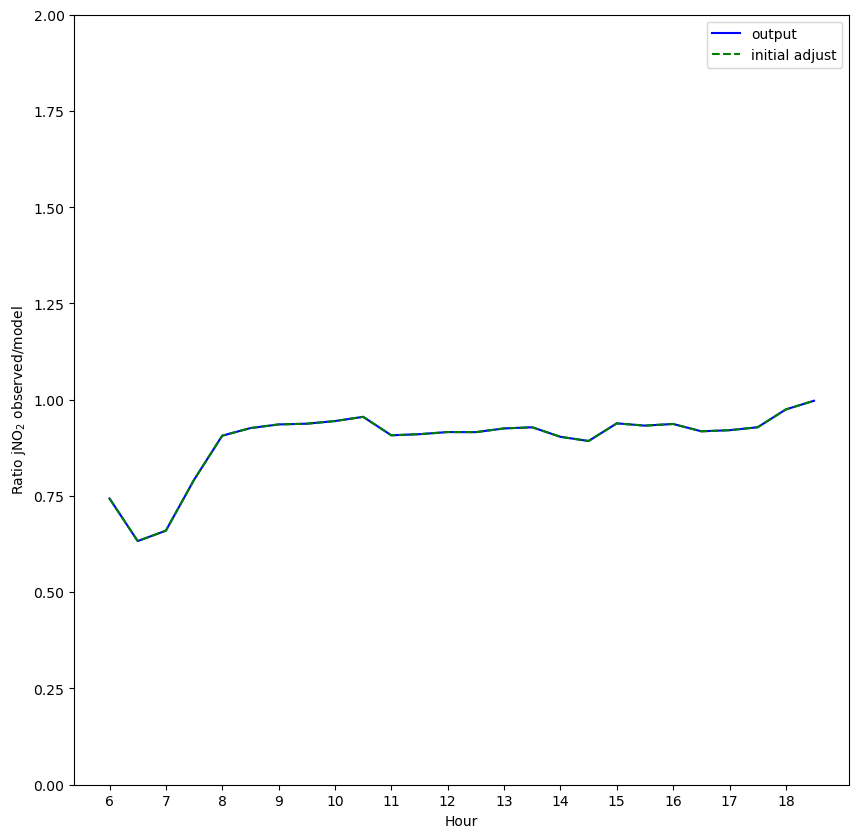

In [ ]:
hour_range = np.arange(6,19,0.5)

df_ratio = model_conc_load['']

adjusted_ratio = obs_conc_load['jNO2_ratio']
df_adjusted_ratio = adjusted_ratio.to_frame(name = 'ratio')
df_adjusted_ratio.index = hour_range

fig, ax = plt.subplots(figsize = (10,10))

plt.plot(hour_range,, color = 'blue', label = 'output')
plt.plot(hour_range, df_adjusted_ratio['ratio'], color = 'green', label = 'initial adjust', linestyle = 'dashed')
plt.xlabel('Hour')
plt.ylabel('Ratio jNO$_2$ observed/model')
#plt.title('Comparison of Ratio between jNO$_2$ observed/model rates for Run'+str(run_number))
plt.xticks(np.arange(6,19))
plt.ylim(0,2)
plt.legend()

#plt.savefig(run_path_plots + 'jno2_ratio_plot.png')
plt.show()

---

## Scrap

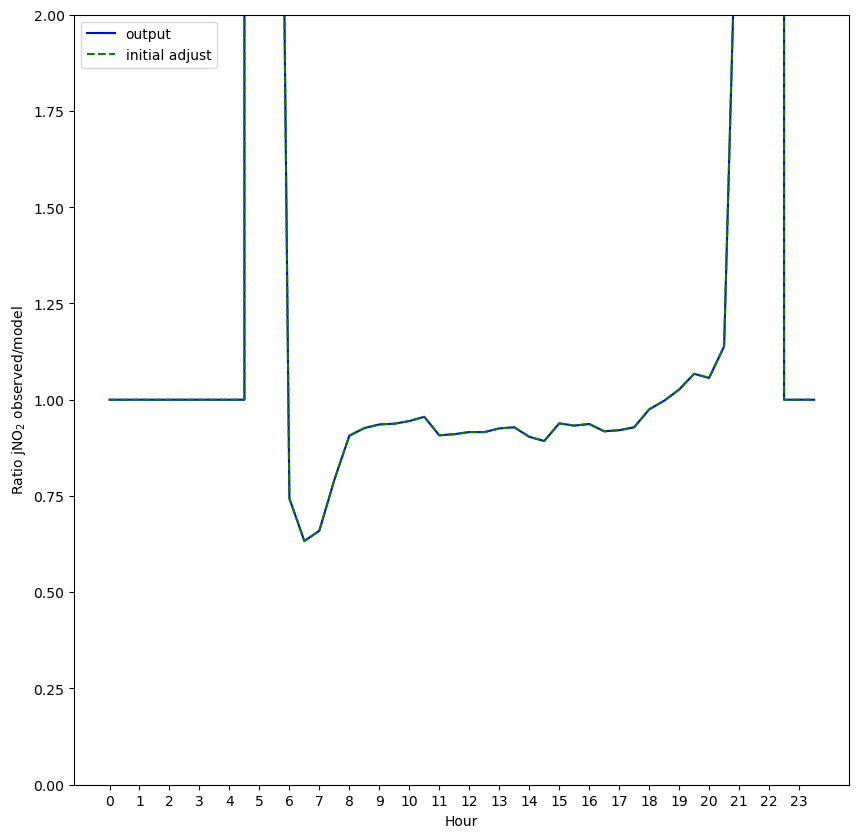

In [175]:
hour_range = np.arange(0,24,0.5)

ratio_jno2 = obs_conc_load['jNO2_meas']/obs_conc_load['jNO2']
ratio_jno2.replace([np.inf, -np.inf], 1, inplace=True)
df_ratio_jno2 = ratio_jno2.to_frame(name = 'ratio')
df_ratio_jno2.index = hour_range

adjusted_ratio = obs_conc_load['jNO2_ratio']
df_adjusted_ratio = adjusted_ratio.to_frame(name = 'ratio')
df_adjusted_ratio.index = hour_range

fig, ax = plt.subplots(figsize = (10,10))

plt.plot(hour_range, df_ratio_jno2['ratio'], color = 'blue', label = 'output')
plt.plot(hour_range, df_adjusted_ratio['ratio'], color = 'green', label = 'initial adjust', linestyle = 'dashed')
plt.xlabel('Hour')
plt.ylabel('Ratio jNO$_2$ observed/model')
#plt.title('Comparison of Ratio between jNO$_2$ observed/model rates for Run'+str(run_number))
plt.xticks(np.arange(0,24))
plt.ylim(0,2)
plt.legend()

#plt.savefig(run_path_plots + 'jno2_ratio_plot.png')
plt.show()

In [226]:
ratio_jno2 = obs_conc_load['jNO2_meas']/obs_conc_load['jNO2']
ratio_jno2.replace([np.inf, -np.inf], 1, inplace=True)
df_ratio_jno2 = ratio_jno2.to_frame(name = 'ratio')
df_ratio_jno2.index = hour_range
print(df_ratio_jno2)

             ratio
0.0   1.000000e+00
0.5   1.000000e+00
1.0   1.000000e+00
1.5   1.000000e+00
2.0   1.000000e+00
2.5   1.000000e+00
3.0   1.000000e+00
3.5   1.000000e+00
4.0   1.000000e+00
4.5   1.000000e+00
5.0   1.993039e+08
5.5   4.554149e+00
6.0   7.435459e-01
6.5   6.328804e-01
7.0   6.598688e-01
7.5   7.920147e-01
8.0   9.065856e-01
8.5   9.263067e-01
9.0   9.358314e-01
9.5   9.376709e-01
10.0  9.445721e-01
10.5  9.555271e-01
11.0  9.075734e-01
11.5  9.104751e-01
12.0  9.160319e-01
12.5  9.157864e-01
13.0  9.254669e-01
13.5  9.284222e-01
14.0  9.036921e-01
14.5  8.927920e-01
15.0  9.385912e-01
15.5  9.327201e-01
16.0  9.369966e-01
16.5  9.179587e-01
17.0  9.208186e-01
17.5  9.285097e-01
18.0  9.748149e-01
18.5  9.973402e-01
19.0  1.026469e+00
19.5  1.067359e+00
20.0  1.056556e+00
20.5  1.138596e+00
21.0  2.574840e+00
21.5  3.758573e+02
22.0  1.051904e+12
22.5  1.000000e+00
23.0  1.000000e+00
23.5  1.000000e+00


In [232]:
df_ratio_jno2['adj_ratio'] = df_ratio_jno2['ratio']
df_ratio_jno2.loc[df_ratio_jno2['adj_ratio'] > 4, 'adj_ratio'] = 1


             ratio  adj_ratio
0.0   1.000000e+00   1.000000
0.5   1.000000e+00   1.000000
1.0   1.000000e+00   1.000000
1.5   1.000000e+00   1.000000
2.0   1.000000e+00   1.000000
2.5   1.000000e+00   1.000000
3.0   1.000000e+00   1.000000
3.5   1.000000e+00   1.000000
4.0   1.000000e+00   1.000000
4.5   1.000000e+00   1.000000
5.0   1.993039e+08   1.000000
5.5   4.554149e+00   1.000000
6.0   7.435459e-01   0.743546
6.5   6.328804e-01   0.632880
7.0   6.598688e-01   0.659869
7.5   7.920147e-01   0.792015
8.0   9.065856e-01   0.906586
8.5   9.263067e-01   0.926307
9.0   9.358314e-01   0.935831
9.5   9.376709e-01   0.937671
10.0  9.445721e-01   0.944572
10.5  9.555271e-01   0.955527
11.0  9.075734e-01   0.907573
11.5  9.104751e-01   0.910475
12.0  9.160319e-01   0.916032
12.5  9.157864e-01   0.915786
13.0  9.254669e-01   0.925467
13.5  9.284222e-01   0.928422
14.0  9.036921e-01   0.903692
14.5  8.927920e-01   0.892792
15.0  9.385912e-01   0.938591
15.5  9.327201e-01   0.932720
16.0  9.36